<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Kareem2602/blob/main/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


In [ ]:
fig_5=px.histogram(particles['pt2'],particles['pt2'])
fig_5.show()

In [ ]:
fig_5=px.histogram(particles['pt1'],particles['pt1'])
fig_5.show()

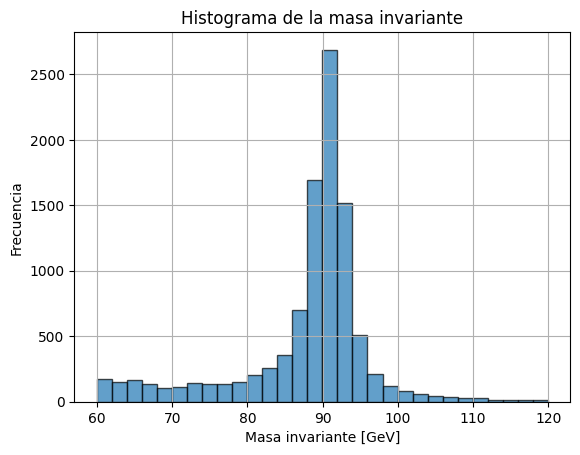

In [4]:
#Vamos a reconstruir la masa invariante utilizando los datos disponibles:
#p_x=pt*cos(phi), p_y=ptsin(phi), p_z=ptsinh(eta)
#Para obetner la energia utilizamos:
#E=ptcosh(eta)
df=particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
#Momento p1:
df_px1=df['pt1']*np.cos(df['phi1'])
df_py1=df['pt1']*np.sin(df['phi1'])
df_pz1=df['pt1']*np.sinh(df['eta1'])
df_E1=df['pt1']*np.cosh(df['eta1'])
#Momento p2:
df_px2=df['pt2']*np.cos(df['phi2'])
df_py2=df['pt2']*np.sin(df['phi2'])
df_pz2=df['pt2']*np.sinh(df['eta2'])
df_E2=df['pt2']*np.cosh(df['eta2'])
#Entonces para la masa invariante:
#M=((E1+E2)^2-|p1+p2|^2)^(1/2)
df_M=((df_E1+df_E2)**2-((df_px1+df_px2)**2+(df_py1+df_py2)**2+(df_pz1+df_pz2)**2))**(1/2)
df['M_Invariant']=df_M

#Aqui ya tenemos nuestra masa invariante
Masa_Invariante=df['M_Invariant'].astype(float)
#Realizamos el histograma
df['M_Invariant'].plot.hist(bins=30, alpha=0.7, edgecolor='black')

plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Frecuencia')
plt.title('Histograma de la masa invariante')
plt.grid(True)
plt.show()

In [5]:
#Del histogrograma anterior podemos saber el numero de eventos que estan en una masa aceptable para el bosonZ o sea 91.182+_0.0085
M_Z1=Masa_Invariante[Masa_Invariante>=91.1749]
MZ=M_Z1[M_Z1<=91.1935]

len(MZ)


31

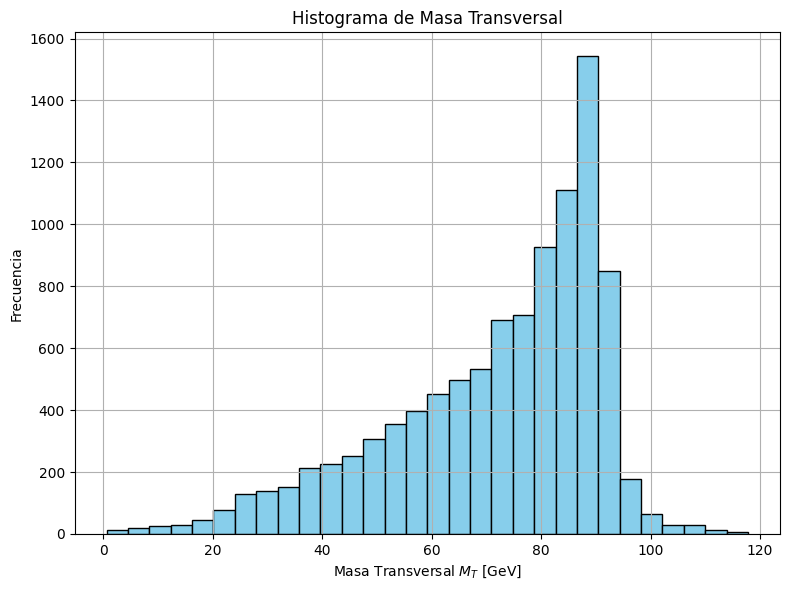

In [6]:
#Calculo de la masa transversal:
#M_t=((2Pt_1*Pt_2(1-(phi1-phi2))))
df['delta_phi'] = df['phi1'] - df['phi2']
df['M_t']=np.sqrt(2 * df['pt1'] * df['pt2'] * (1 - np.cos(df['delta_phi'])))
Masa_t=df['M_t'].astype(float)

#Histograma de Masa Transversal
plt.figure(figsize=(8, 6))
plt.hist(df['M_t'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Masa Transversal $M_T$ [GeV]')
plt.ylabel('Frecuencia')
plt.title('Histograma de Masa Transversal')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
M_Zt1=df[Masa_t>=91.1749]
MZt=M_Zt1[M_Zt1<=91.1935]
len(MZt)

912

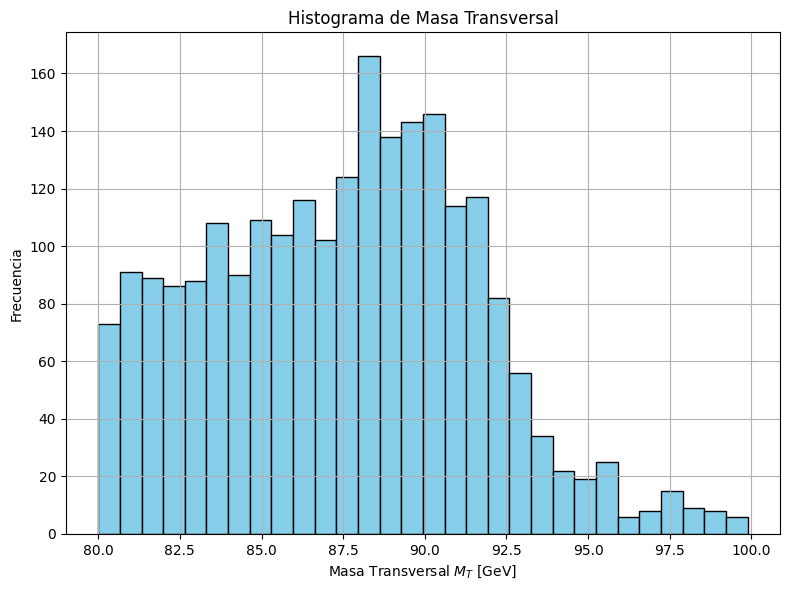

In [8]:
#Se hace un corte para tener solo eventos con bajo aislamiento

df_MT_cut = df[(df['M_t'] > 80) & (df['M_t'] < 100) & (df['iso1'] < 0.15) & (df['iso2'] < 0.15)]

plt.figure(figsize=(8, 6))
# Cambié df['df_MT_cut'] por df_MT_cut['M_t'], porque df_MT_cut es un DataFrame filtrado, no una columna
plt.hist(df_MT_cut['M_t'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Masa Transversal $M_T$ [GeV]')
plt.ylabel('Frecuencia')
plt.title('Histograma de Masa Transversal')
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
df_MT_cut_z = df_MT_cut[(df_MT_cut['M_t'] > 91.1749) & (df_MT_cut['M_t'] < 91.1935)]
len(df_MT_cut_z)

6

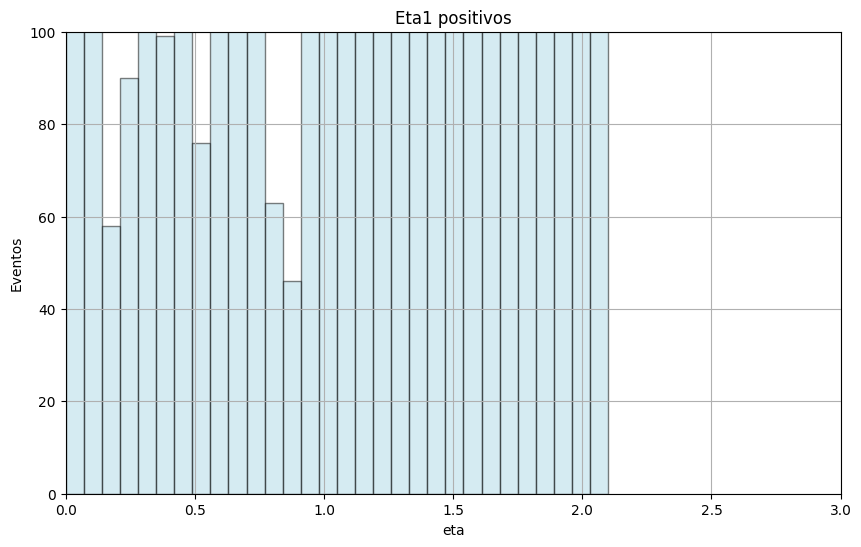

In [24]:
eta1=df['eta1'].astype(float)
eta1pos=eta1[eta1>0]

eta2=df["eta2"].astype(float)
eta2pos=eta2[eta2>0]

plt.figure(figsize=(10,6))
plt.title("Eta1 positivos")
eta1pos.hist(bins=30,color='lightblue',edgecolor='black',alpha=.5)
#eta2pos.hist(bins=30,color='green',edgecolor='black')
plt.axis([0,3, 0, 100])
plt.xlabel('eta')
plt.ylabel('Eventos')
plt.show()

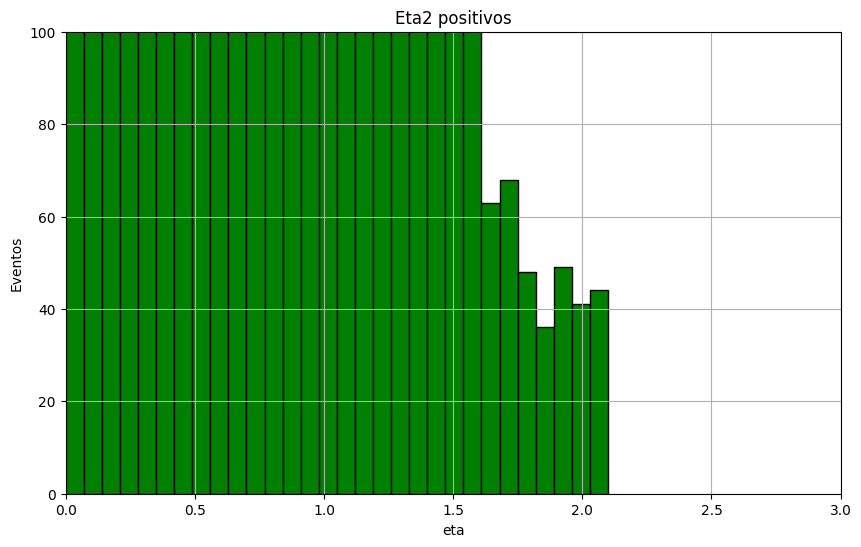

In [11]:
plt.figure(figsize=(10,6))
plt.title("Eta2 positivos")
#eta1pos.hist(bins=30,color='lightblue',edgecolor='black',alpha=.5)
eta2pos.hist(bins=30,color='green',edgecolor='black')
plt.axis([0,3, 0, 100])
plt.xlabel('eta')
plt.ylabel('Eventos')
plt.show()

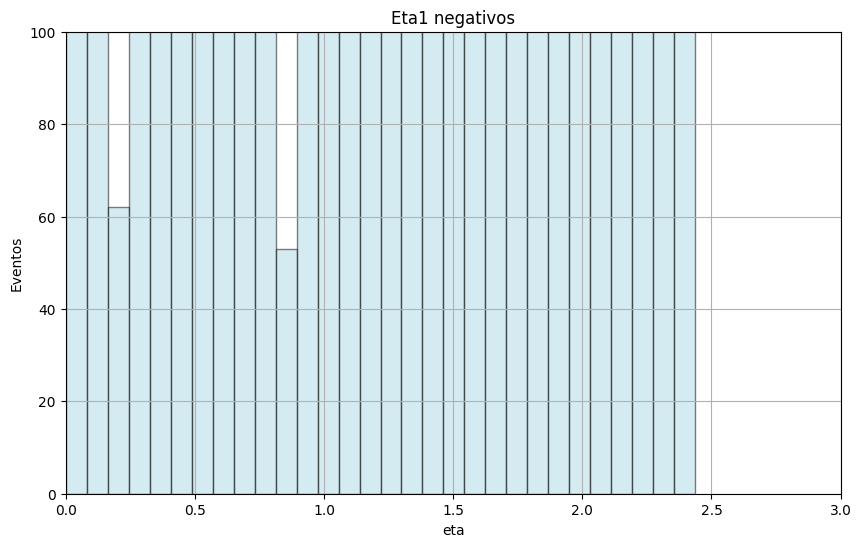

In [27]:
eta1neg=eta1[eta1<0]
eta1negabs=abs(eta1neg)

eta2neg=eta2[eta2<0]
eta2negabs=abs(eta2neg)
plt.figure(figsize=(10,6))
plt.title("Eta1 negativos")
eta1negabs.hist(bins=30,color='lightblue',edgecolor='black',alpha=.5)
#eta2negabs.hist(bins=30,color='lightgreen',edgecolor='black') #Para histogramas
plt.axis([0,3, 0, 100])
plt.xlabel('eta')
plt.ylabel('Eventos')
plt.show()


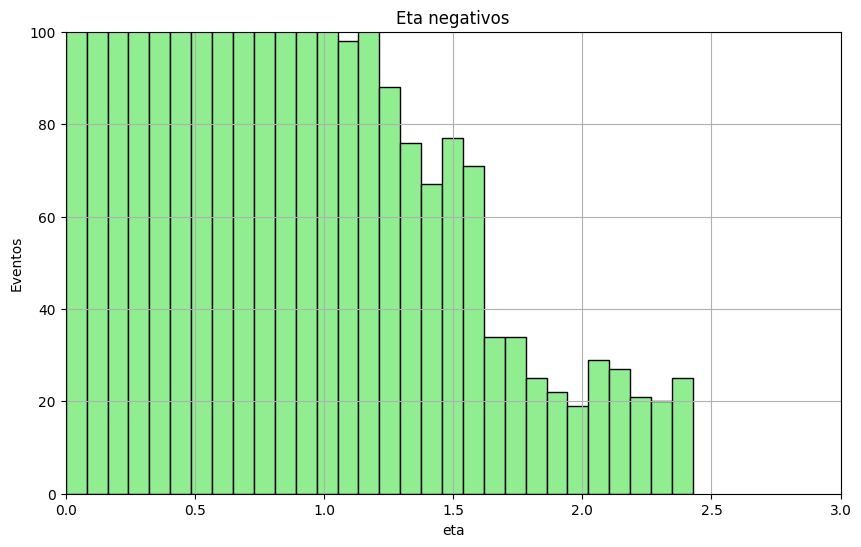

In [14]:
ta1neg=eta1[eta1<0]
eta1negabs=abs(eta1neg)

eta2neg=eta2[eta2<0]
eta2negabs=abs(eta2neg)
plt.figure(figsize=(10,6))
plt.title("Eta negativos")
#eta1negabs.hist(bins=1000,color='lightblue',edgecolor='black',alpha=.5)
eta2negabs.hist(bins=30,color='lightgreen',edgecolor='black') #Para histogramas
plt.axis([0,3, 0, 100])
plt.xlabel('eta')
plt.ylabel('Eventos')
plt.show()


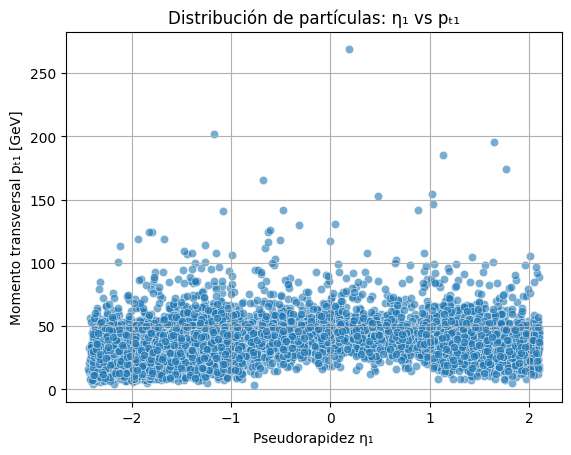

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='eta1', y='pt1', alpha=0.6)
plt.xlabel('Pseudorapidez η₁')
plt.ylabel('Momento transversal pₜ₁ [GeV]')
plt.title('Distribución de partículas: η₁ vs pₜ₁')
plt.grid(True)
plt.show()

In [28]:
correlacion = df['eta1'].corr(df['pt1'])
print(f'Coeficiente de correlación: {correlacion:.3f}')
#Vemos que no existe una correlacion fuerte entre eta y pt

Coeficiente de correlación: 0.154


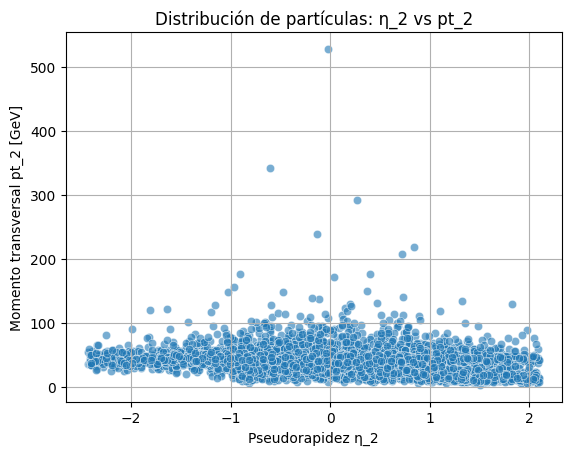

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='eta2', y='pt2', alpha=0.6)
plt.xlabel('Pseudorapidez η_2')
plt.ylabel('Momento transversal pt_2 [GeV]')
plt.title('Distribución de partículas: η_2 vs pt_2')
plt.grid(True)
plt.show()

In [23]:
correlacion = df['eta2'].corr(df['pt2'])
print(f'Coeficiente de correlación: {correlacion:.3f}')
#Vemos que no existe una correlacion fuerte entre eta y pt

Coeficiente de correlación: -0.198
